In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas

# Function that creates the X matrix as defined for fitting our model
# Each row is x_i (scalar) getting raised to increasing powers
def create_X(x,deg):
    X = np.ones((len(x),deg+1))
    for i in range(1,deg+1):
        X[:,i] = x**i # :, gets entire ith column
                      # x is entire x column from csv, it appears ** is applied to whole column at once
    return X

# Function for predicting the response
def predict_y(x,beta):
    created_x = create_X(x,len(beta)-1)
    return np.dot(created_x,beta)

# Function for fitting the model
def fit_beta(df,deg):
    return np.linalg.lstsq(create_X(df.x,deg),df.y,rcond=None)[0]

# Function for computing the MSE
def mse(y,yPred):
    return np.mean((y-yPred)**2)

# Loading training, validation and test data
dfTrain = pandas.read_csv('/Users/liam_adams/my_repos/csc591/hw01b/hw01_files/Data_Train.csv')
dfVal = pandas.read_csv('/Users/liam_adams/my_repos/csc591/hw01b/hw01_files/Data_Val.csv')
dfTest = pandas.read_csv('/Users/liam_adams/my_repos/csc591/hw01b/hw01_files/Data_Test.csv')

############ TRAINING A MODEL
deg = 1
# Fitting model
def fit(df_x, deg):
    #X = create_X(dfTrain.x,deg) # X is [len(dftrain.x), deg+1] matrix
    beta = fit_beta(df_x,deg) # beta = (X^TX)^-1 X^TY which is deg + 1 column vector
    return beta

# Computing training error
def train_err(df, beta):
    yPredTrain = predict_y(df.x,beta) # multiply each row in X by beta column vector to get prediction for each row
    err = mse(df.y,yPredTrain) # calculate loss for each predction len(x) column vector
    print('Training Error = {:2.3}'.format(err))
    return err

# Computing test error
def test_err(df_test, beta):
    yPredTest = predict_y(df_test.x,beta)
    err = mse(df_test.y,yPredTest)
    print('Test Error = {:2.3}'.format(err))
    return err

beta = fit(dfTrain, deg)
train_err(dfTrain, beta)
test_err(dfTest, beta)


Training Error = 0.0258
Test Error = 0.0154


0.015434523680623655

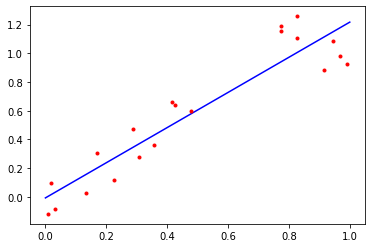

In [2]:
############ PLOTTING FITTED MODEL
x = np.linspace(0,1,100)
y = predict_y(x,beta)

plt.plot(x,y,'b-',dfTrain.x,dfTrain.y,'r.')
plt.show()

Training Error = 0.0258
Test Error = 0.0249
Training Error = 0.0188
Test Error = 0.0186
Training Error = 0.00967
Test Error = 0.00843
Training Error = 0.00929
Test Error = 0.00934
Training Error = 0.00902
Test Error = 0.0109
Training Error = 0.00874
Test Error = 0.0108
Training Error = 0.00873
Test Error = 0.0109
Training Error = 0.00873
Test Error = 0.0111
Training Error = 0.00823
Test Error = 0.0152
Training Error = 0.00673
Test Error = 0.0392


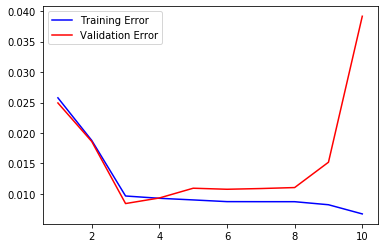

In [3]:
############ HYPER-PARAMETER TUNING

# Initializing range of degree values to be tested and errors
degRange = list(range(1,11))
errTrain = np.zeros(len(degRange))
errVal = np.zeros(len(degRange))

# Computing error as a function of degree
for d in degRange:
    beta = fit(dfTrain, d)
    tr_err = train_err(dfTrain, beta)
    te_err = test_err(dfVal, beta)
    errTrain[d - 1] = tr_err
    errVal[d - 1] = te_err

    
# Plotting training and validation errors
plt.plot(degRange,errTrain,'b-',degRange,errVal,'r-')
plt.legend(('Training Error','Validation Error'))
plt.show()

In [4]:
############ TRAINING SELECTED MODEL

# Concatenating data training and validation data frames
df_list = []
df_list.append(dfTrain)
df_list.append(dfVal)
df = pandas.concat(df_list, 0)

# Fit model using the optimal degree found in the previous cell
degOpt = 3

# Compute and print training and test errors
beta = fit(df, degOpt)
tr_err = train_err(df, beta)
te_err = test_err(dfTest, beta)

Training Error = 0.0087
Test Error = 0.0108


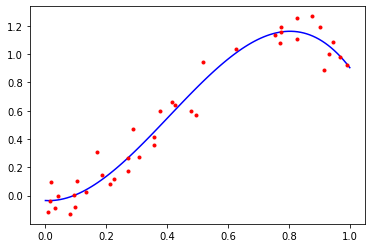

In [5]:
############ PLOTTING FITTED MODEL
# Plot the fitted model as in the second cell
x = np.linspace(0,1,100)
y = predict_y(x,beta)

plt.plot(x,y,'b-',df.x,df.y,'r.')
plt.show()